# Projection Matrices and Least Squares

## 1) Definition

**Projection Matrix:** Given a matrix $A \in \mathbb{R}^{m \times n}$ with full column rank, the **projection matrix** that projects any vector $\mathbf{b} \in \mathbb{R}^m$ onto the column space of $A$ is:

$$
P = A (A^T A)^{-1} A^T
$$

**Least Squares Solution:** For an overdetermined system $A\mathbf{x} = \mathbf{b}$, the **least squares solution** minimizes the residual:

$$
\hat{\mathbf{x}} = \arg\min_\mathbf{x} \|\mathbf{b} - A \mathbf{x}\|_2
$$

The solution is given by:

$$
\hat{\mathbf{x}} = (A^T A)^{-1} A^T \mathbf{b}
$$


## 2) Derivation

1. For $A\mathbf{x} = \mathbf{b}$, the residual is $\mathbf{r} = \mathbf{b} - A\mathbf{x}$.
2. The least squares solution minimizes $\|\mathbf{r}\|^2 = \mathbf{r}^T \mathbf{r}$.
3. Take derivative w.r.t. $\mathbf{x}$ and set to zero:
$$
\frac{\partial}{\partial \mathbf{x}} \|\mathbf{b} - A\mathbf{x}\|^2 = -2A^T(\mathbf{b} - A\mathbf{x}) = 0
$$
4. Solve for $\mathbf{x}$:
$$
A^T A \hat{\mathbf{x}} = A^T \mathbf{b} \quad \Rightarrow \quad \hat{\mathbf{x}} = (A^T A)^{-1} A^T \mathbf{b}
$$
5. The projection of $\mathbf{b}$ onto the column space of $A$ is:
$$
\mathbf{p} = A \hat{\mathbf{x}} = A (A^T A)^{-1} A^T \mathbf{b} = P \mathbf{b}
$$


## 3) Computation Steps

**Step 1:** Identify matrix $A$ and vector $\mathbf{b}$.

**Step 2:** Compute $A^T A$ and $A^T \mathbf{b}$.

**Step 3:** Solve the normal equation:
$$
A^T A \hat{\mathbf{x}} = A^T \mathbf{b} \quad \Rightarrow \quad \hat{\mathbf{x}} = (A^T A)^{-1} A^T \mathbf{b}
$$

**Step 4:** Compute the projection of $\mathbf{b}$ onto the column space of $A$:
$$
\mathbf{p} = A \hat{\mathbf{x}} = P \mathbf{b}
$$

**Step 5:** The residual vector:
$$
\mathbf{r} = \mathbf{b} - \mathbf{p}
$$


In [1]:
import numpy as np

# Example matrix A (m x n) and vector b (m x 1)
A = np.array([[1, 1],
              [1, 2],
              [1, 3]])
b = np.array([1, 2, 2])

# Compute least squares solution
x_hat = np.linalg.inv(A.T @ A) @ A.T @ b

# Compute projection matrix
P = A @ np.linalg.inv(A.T @ A) @ A.T

# Project b onto column space of A
p = P @ b

print("Least squares solution x_hat:", x_hat)
print("Projection matrix P:\n", P)
print("Projected vector p:", p)


Least squares solution x_hat: [0.66666667 0.5       ]
Projection matrix P:
 [[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]
Projected vector p: [1.16666667 1.66666667 2.16666667]


## 4) Plotting

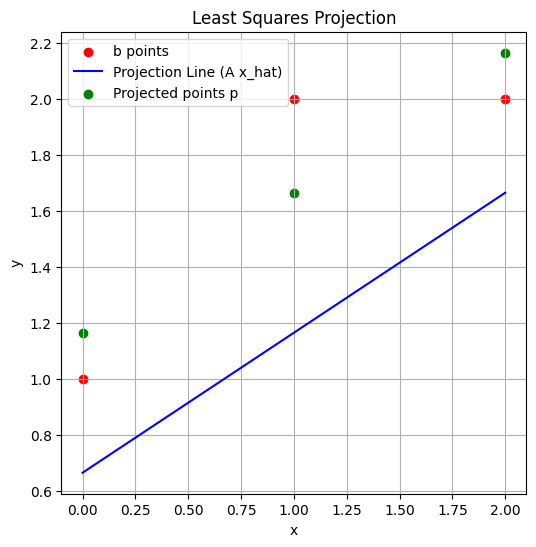

In [2]:
import matplotlib.pyplot as plt

# Only works for 2D or 3 points in 2D
plt.figure(figsize=(6,6))

# Plot original points (b)
plt.scatter([0, 1, 2], b, color='r', label='b points')

# Plot projection line (A column space)
x_vals = np.linspace(0, 2, 100)
y_vals = x_hat[0] + x_hat[1]*x_vals
plt.plot(x_vals, y_vals, color='b', label='Projection Line (A x_hat)')

# Plot projection points on line
proj_points = A @ x_hat
plt.scatter([0,1,2], proj_points, color='g', label='Projected points p')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Least Squares Projection")
plt.legend()
plt.grid(True)
plt.show()


## 5) Use Cases of Projection Matrices and Least Squares

1. **Data Fitting:** Fit linear models to experimental or observational data.
2. **Signal Processing:** Project signals onto subspaces to remove noise.
3. **Machine Learning:** Linear regression uses least squares to estimate coefficients.
4. **Computer Graphics:** Project points onto planes or lines for rendering.
5. **Optimization:** Solve overdetermined systems and minimize errors in engineering problems.
